<a href="https://colab.research.google.com/github/coding-with-rupam/LetsGrowMore/blob/main/Handwritten_digits_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

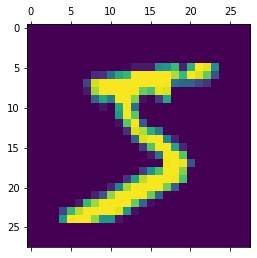

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4656 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9260


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9267


[0.2676893174648285, 0.9266999959945679]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.5887966e-02, 4.8421668e-07, 5.6255937e-02, 9.6667230e-01,
       3.0821264e-03, 1.3796991e-01, 1.9691645e-06, 9.9975967e-01,
       9.8041415e-02, 5.8083409e-01], dtype=float32)

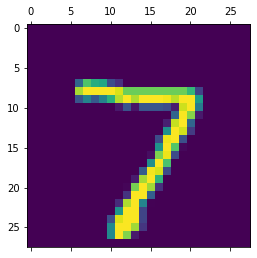

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  920,   20,   10,    4,   12,    9,   41,    4],
       [   2,    0,   14,  932,    1,   19,    2,    9,   23,    8],
       [   1,    1,    4,    1,  929,    0,    9,    3,    9,   25],
       [   8,    3,    3,   41,   12,  769,   15,    4,   30,    7],
       [   9,    3,    5,    1,    8,   12,  917,    2,    1,    0],
       [   1,    6,   22,   10,   11,    1,    0,  940,    2,   35],
       [   7,    8,    6,   23,   10,   24,   10,    9,  870,    7],
       [  11,    7,    1,   11,   37,    6,    0,   15,    7,  914]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

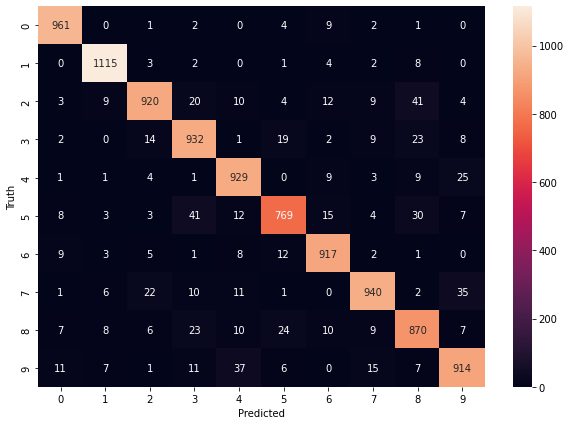

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Hidden Layers

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0667 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9839


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9741


[0.08291127532720566, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

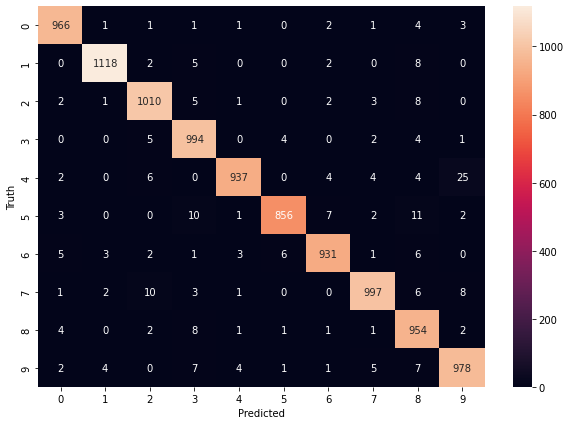

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
import cv2

In [26]:
img= cv2.imread('2.png')

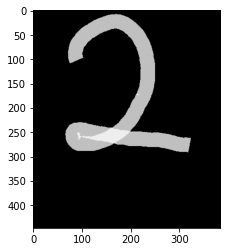

In [27]:
plt.imshow(img)

In [28]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [29]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [30]:
resized.shape

(28, 28)

In [31]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [32]:
newimg=np.array(newimg).reshape(1,28*28)
#X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [33]:
newimg.shape

(1, 784)

In [34]:
predictions = model.predict(newimg)

In [35]:
print(np.argmax(predictions))

2


In [46]:
img2= cv2.imread('1.png')

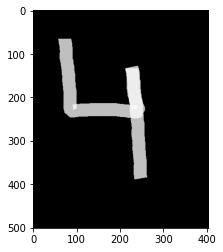

In [47]:
plt.imshow(img2)

In [48]:
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [49]:
resized2=cv2.resize(gray2,(28,28),interpolation=cv2.INTER_AREA)

In [50]:
resized2.shape

(28, 28)

In [51]:
newimg2=tf.keras.utils.normalize(resized2,axis=1)

In [52]:
newimg2=np.array(newimg2).reshape(1,28*28)

In [53]:
newimg2.shape

(1, 784)

In [54]:
predictions2 = model.predict(newimg2)

In [55]:
print(np.argmax(predictions2))

4
